In [14]:
import pandas as pd
import os
import numpy as np
import networkx as nx 
from pyvis.network import Network

In [15]:
# read data
df_cate = pd.read_csv('./data/wikispeedia_paths-and-graph/categories.tsv', sep='\t', header=None, comment='#')
df_cate.head(5)

,0,1
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


In [16]:
novel_name = df_cate[df_cate[1]=='subject.Language_and_literature.Novels'][0]

In [17]:
print(pd.unique(novel_name))

['A_Christmas_Carol' 'A_Tale_of_a_Tub' 'A_Wrinkle_in_Time'
 'Alice%27s_Adventures_in_Wonderland' 'Anna_Karenina' 'Charlotte%27s_Web'
 'Crime_and_Punishment' 'David_Copperfield_%28novel%29' 'Frankenstein'
 'Harry_Potter' 'Howards_End' 'Jane_Eyre' 'Kidnapped_%28novel%29'
 'Little_Women' 'Nineteen_Eighty-Four' 'Oliver_Twist'
 'One_Flew_Over_the_Cuckoo%27s_Nest_%28novel%29' 'Oroonoko'
 'Pride_and_Prejudice' 'Private_Peaceful' 'Robinson_Crusoe'
 'Starship_Troopers' 'The_Brothers_Karamazov' 'The_Catcher_in_the_Rye'
 'The_Count_of_Monte_Cristo'
 'The_Curious_Incident_of_the_Dog_in_the_Night-time'
 'The_Hitchhiker%27s_Guide_to_the_Galaxy' 'The_Hobbit'
 'The_Lion%2C_the_Witch_and_the_Wardrobe' 'The_Lorax'
 'The_Lord_of_the_Rings' 'The_Old_Man_and_the_Sea' 'The_Oz_books'
 'The_Picture_of_Dorian_Gray' 'The_Pilgrim%27s_Progress'
 'To_Kill_a_Mockingbird' 'Treasure_Island' 'War_and_Peace' 'Wolf_Brother']


In [18]:
#conda install -c conda-forge graph-tool
#conda install -c conda-forge rdflib

In [27]:
df_finished_path = pd.read_csv('./data/wikispeedia_paths-and-graph/paths_finished2.tsv', sep='\t')
df_finished_path.head(5)


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


In [28]:
df_finished_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51318 entries, 0 to 51317
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  51315 non-null  object 
 1   timestamp        51318 non-null  int64  
 2   durationInSec    51318 non-null  int64  
 3   path             51318 non-null  object 
 4   rating           28501 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ MB


In [29]:
# delete paths contain "back/<"
df_finished_path = df_finished_path[df_finished_path["path"].str.contains("<")==False]
df_finished_path.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42323 entries, 0 to 51317
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hashedIpAddress  42321 non-null  object 
 1   timestamp        42323 non-null  int64  
 2   durationInSec    42323 non-null  int64  
 3   path             42323 non-null  object 
 4   rating           23566 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ MB


In [42]:
# exact graph structure
df_graph = pd.DataFrame()
df_finished_path['path_list'] = df_finished_path['path'].apply(lambda x: x.split(';'))
df_graph['Source'] = df_finished_path['path_list'].apply(lambda x: x[0])
df_graph['Target'] = df_finished_path['path_list'].apply(lambda x: x[-1])
df_graph['Type'] = 'Undirected'
df_graph['weight'] = df_finished_path['path_list'].apply(lambda x: len(x))
df_graph.head()

,Source,Target,Type,weight
0,14th_century,African_slave_trade,Undirected,9
1,14th_century,African_slave_trade,Undirected,5
2,14th_century,African_slave_trade,Undirected,8
3,14th_century,Greece,Undirected,4
4,14th_century,John_F._Kennedy,Undirected,7


In [55]:
G = nx.from_pandas_edgelist(df_graph[:100], source='Source', target='Target', edge_attr='weight')

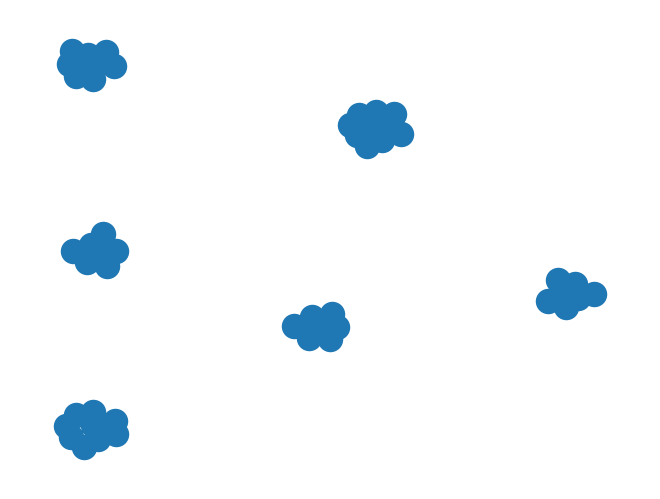

In [59]:
nx.draw(G)

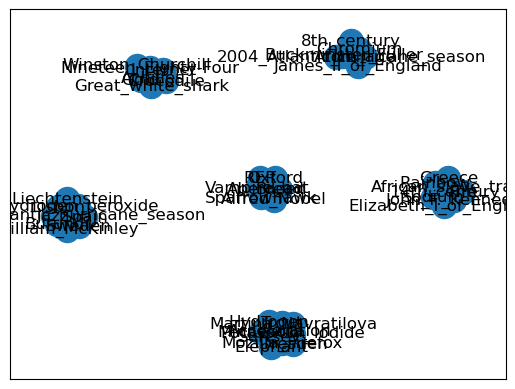

In [60]:
nx.draw_networkx(G)

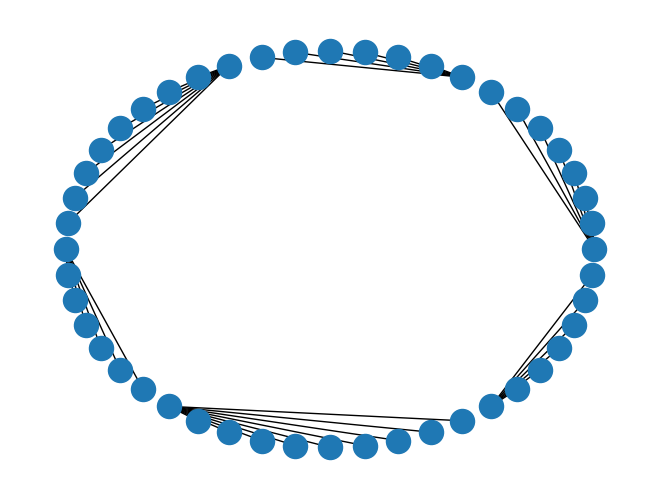

In [61]:
nx.draw_circular(G)

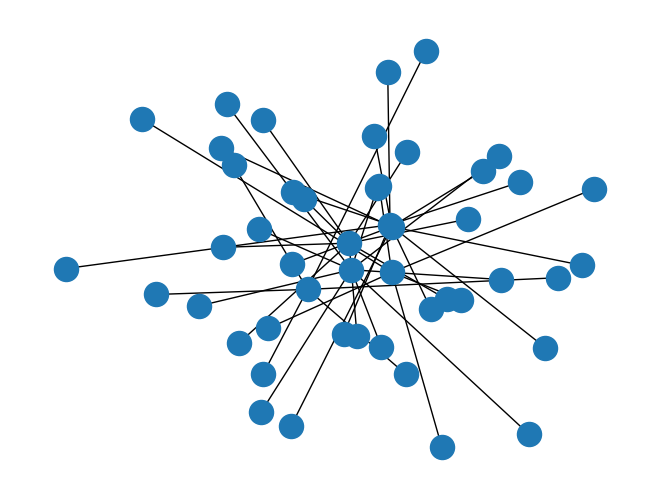

In [62]:
nx.draw_kamada_kawai(G)

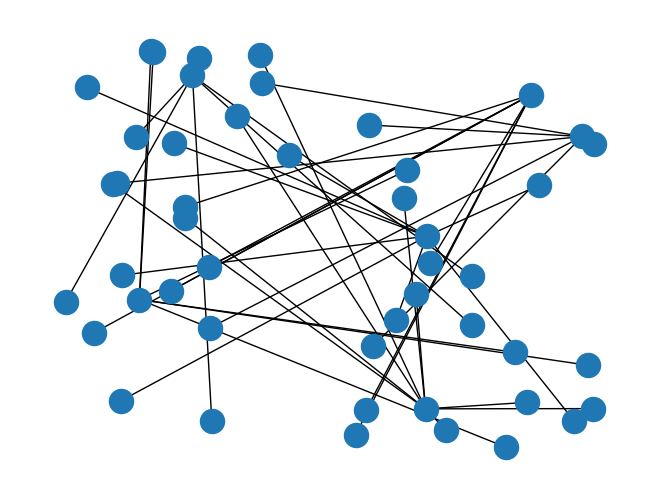

In [63]:
nx.draw_random(G)

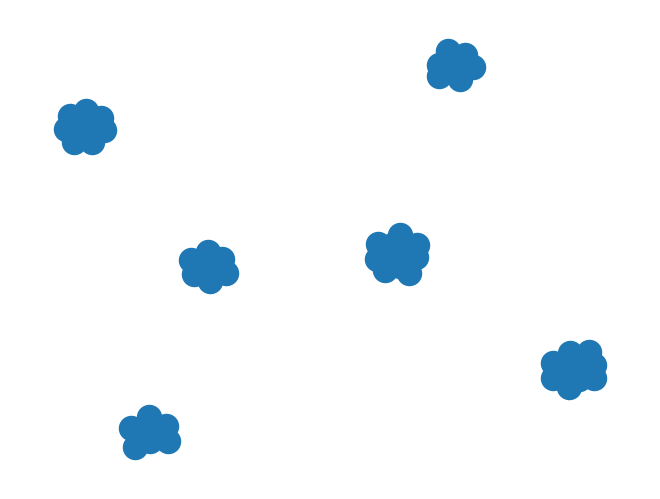

In [64]:
nx.draw_spring(G)

In [54]:
# interactive visualization
#net = Network(notebook=True)
#net.from_nx(G)
#net.show("example.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
